In [1]:
# cnn basic
# conv2d layer
# max pooling layer
# toy image 사용

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(1, 3, 3, 1)


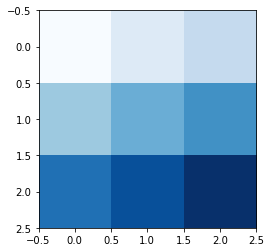

In [2]:
# 입력 이미지
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]] , dtype=np.float32)

print(image.shape)   # (1, 3, 3, 1)  ,  4차원
plt.imshow(image.reshape(3,3), cmap='Blues')
plt.show()

[[[[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]]]
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
(1, 2, 2, 1)


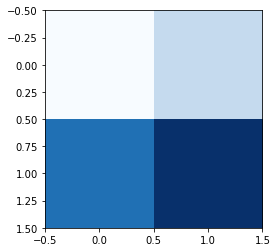

In [3]:
# CNN(Convolutional Neural Network)
# conv2d layer , filter : (2,2,1,1), strides : 1

# 입력 이미지 : (1,3,3,1)
# 1 : 이미지의 갯수
# 3 : 이미지의 가로 크기
# 3 : 이미지의 세로 크기
# 1 : Color ,  Grey scale ==> 1,  RGB ==> 3

#filter : (2,2,1,1)
# 2 : 필터의 가로 크기
# 2 : 필터의 세로 크기
# 1 : Color ,  Grey scale ==> 1,  RGB ==> 3
# 1 : filter의 갯수  (여러장 가능한)

# (N - F) / strides  + 1
# 출력 이미지 : ( 3 - 2 ) / 1  + 1 = 2,  zero padding을 안 했을 때 (padding='VALID')
# (1, 3, 3, 1) --> (1, 2, 2, 1)

# filter : (2, 2, 1, 1)
weight = tf.constant([[[[1.]],[[1.]]],   
                      [[[1.]],[[1.]]]])
print(weight.numpy())

# conv2d layer
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')

conv2d_image = conv2d.numpy()
print(conv2d_image)
print(conv2d_image.shape)   # (1, 2, 2, 1)

# 시각화
plt.imshow(conv2d_image.reshape(2,2), cmap='Blues')
plt.show()

[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]
(1, 3, 3, 1)


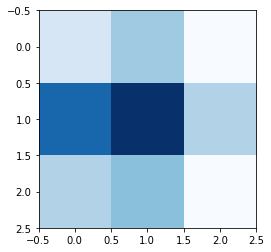

In [4]:
# 출력 이미지 : ( 3 - 2 ) / 1  + 1 = 2,  zero padding을 했을 때 (padding='SAME')
# (1, 3, 3, 1) --> (1, 2, 2, 1)

filter : (2, 2, 1, 1)
weight = tf.constant([[[[1.]],[[1.]]],   
                      [[[1.]],[[1.]]]])
# print(weight.numpy())

# conv2d layer
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')

conv2d_image = conv2d.numpy()
print(conv2d_image)
print(conv2d_image.shape)   # (1, 3, 3, 1)

# 시각화
plt.imshow(conv2d_image.reshape(3,3), cmap='Blues')
plt.show()

[[[[ 12. 120. -12.]
   [ 16. 160. -16.]
   [  9.  90.  -9.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]
   [ 15. 150. -15.]]

  [[ 15. 150. -15.]
   [ 17. 170. -17.]
   [  9.  90.  -9.]]]]
(1, 3, 3, 3)
------------------------------------------
[[[[ 12.]
   [ 16.]
   [  9.]]

  [[ 24.]
   [ 28.]
   [ 15.]]

  [[ 15.]
   [ 17.]
   [  9.]]]


 [[[120.]
   [160.]
   [ 90.]]

  [[240.]
   [280.]
   [150.]]

  [[150.]
   [170.]
   [ 90.]]]


 [[[-12.]
   [-16.]
   [ -9.]]

  [[-24.]
   [-28.]
   [-15.]]

  [[-15.]
   [-17.]
   [ -9.]]]]
(3, 3, 3, 1)


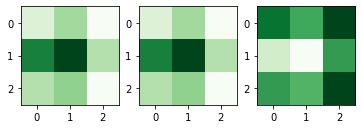

In [5]:
# conv2d layer, 3 filters, zero padding(padding='SAME')
# image : (1,3,3,1), filter : (2,2,1,3) , strides = (1,1,1,1)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],     
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
weight.numpy()
weight.shape

# conv2d layer
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')

conv2d_image = conv2d.numpy()
print(conv2d_image)
print(conv2d_image.shape)   # (1, 3, 3, 1)

print('------------------------------------------')

# 시각화
conv2d_image = np.swapaxes(conv2d_image, 0,3)  # 0번 축과 3번 축이 서로 맞바꿔짐
print(conv2d_image)
print(conv2d_image.shape)    # (3, 3, 3, 1)

for i ,one_image in enumerate(conv2d_image):   # 3회 반복
   # print(one_image)
    plt.subplot(1,3,i+1)
    plt.imshow(one_image.reshape(3,3), cmap='Greens')
plt.show()


[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]
(1, 2, 2, 1)


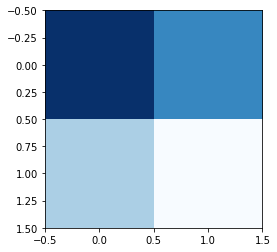

In [6]:
# max pooling
image  = np.array([[[[4.],[3.]],
                    [[2.],[1.]]]],dtype=np.float32)
print(image)
print(image.shape)    # (1, 2, 2, 1)
plt.imshow(image.reshape(2,2),cmap='Blues')
plt.show()

In [7]:
# padding='VALID'  , zero padding을 하지 않음  , (1,2,2,1) --> (1,1,1,1)
# (N - F)/strides + 1 , F: kernel size(ksize)
# (2 - 2)/1 + 1 = 1
# ksize : 2, 원본에서 추출할 이미지의 범위

pool = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,1,1,1], padding='VALID')
print(pool.numpy())
print(pool.shape)     # (1, 1, 1, 1)

[[[[4.]]]]
(1, 1, 1, 1)


In [8]:
# padding='SAME'  , zero padding을 했을 때  , (1,2,2,1) --> (1, 2, 2, 1)
# (N - F)/strides + 1 , F: kernel size(ksize)
# (2 - 2)/1 + 1 = 1
# ksize : 2, 원본에서 추출할 이미지의 범위

pool = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,1,1,1], padding='SAME')
print(pool.numpy())
print(pool.shape)     # (1, 2, 2, 1)

[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]
(1, 2, 2, 1)


(60000, 28, 28)
(28, 28)
T-shirt/top


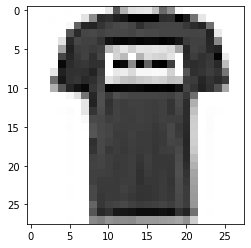

In [9]:
# Fashion MNIST imgae data 처리
# fashin_mnist 데이터 가져오기

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

print(x_train.shape)  # (60000, 28, 28)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

image = x_train[1]
print(image.shape)  # (28, 28)
print(class_names[y_train[1]])  # T-shirt/top , 티셔츠/상의

plt.imshow(image,cmap='Greys')
plt.show()

(1, 28, 28, 1)
(1, 14, 14, 5)
(5, 14, 14, 1)


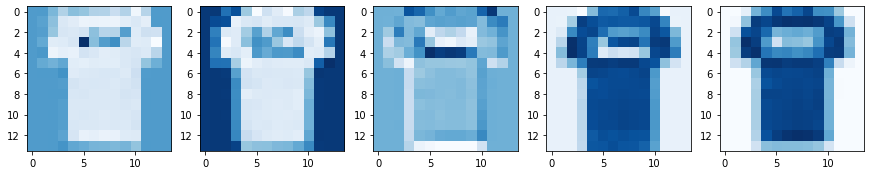

In [20]:
#### MNIST conv2d layer
# image : (1,28,28,1)
# filter : (3,3,1,5) , 필터 5개
# stride : (1,2,2,1) , padding = 'SAME'
# 출력 이미지 : (28+1 - 3)/2 + 1 = 14
# (1,28,28,1) --> (1,14,14,5)

img = image.reshape(-1,28,28,1)    # 입력 이미지의 shape을 4차원으로 변경
print(img.shape)  # (1, 28, 28, 1)

W = tf.Variable(tf.random.normal([3,3,1,5]), name='weight')  # weight = filter
conv2d = tf.nn.conv2d(img,W,strides=[1,2,2,1],padding="SAME")

conv2d_image = conv2d.numpy()
print(conv2d_image.shape)    # (5, 14, 14, 1)


# 시각화
conv2d_image = np.swapaxes(conv2d_image, 0,3)  # 0번 축과 3번 축이 서로 맞바꿔짐
# print(conv2d_image)
print(conv2d_image.shape)    # (5, 14, 14, 1)

plt.figure(figsize=(15,15))
for i ,one_image in enumerate(conv2d_image):   # 5회 반복
   # print(one_image)
    plt.subplot(1,5,i+1)
    plt.imshow(one_image.reshape(14,14), cmap='Blues')
plt.show()

(1, 7, 7, 5)
(5, 7, 7, 1)


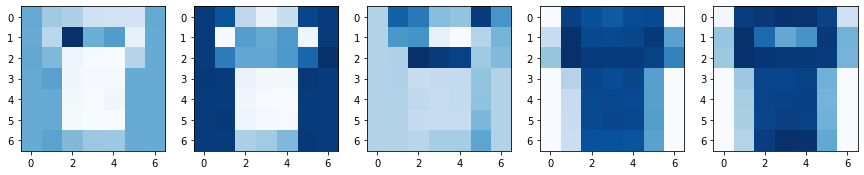

In [23]:
# MNIST max_pool layer
# conv2d image : (1, 14, 14, 5)
# ksize : (1,2,2,1), strides :(1,2,2,1), padding='SAME'
# 출력 이미지 : (14+1 - 2)/2 + 1 = 7
# (1, 14, 14, 5) --> (1, 7, 7, 5)

pool = tf.nn.max_pool(conv2d,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

pool_img = pool.numpy()
print(pool_img.shape)   # (1, 7, 7, 5)

# 시각화
pool_image = np.swapaxes(pool_img,0,3) # 0번 축과 3번 축이 서로 맞바꾸어짐
# print(pool_image)
print(pool_image.shape) # (5, 7, 7, 1)

plt.figure(figsize=(15,15))
for i,one_image in enumerate(pool_image):
    #print(one_image)
    plt.subplot(1,5,i + 1)
    plt.imshow(one_image.reshape(7,7),cmap='Blues')
plt.show()